In [3]:
# headlines.csv

#### Import the libraries

In [6]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from nltk import pos_tag
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer, WordNetLemmatizer
# from pip install wordcloud
from wordcloud import WordCloud

#### Reading the file

In [13]:
df = pd.read_csv('headlines.csv', header= None)
df

,0
0,Budget to set scene for election\n \n Gordon B...
1,Army chiefs in regiments decision\n \n Militar...
2,Howard denies split over ID cards\n \n Michael...
3,Observers to monitor UK election\n \n Minister...
4,Kilroy names election seat target\n \n Ex-chat...
...,...
2220,India opens skies to competition\n \n India wi...
2221,Yukos bankruptcy 'not US matter'\n \n Russian ...
2222,Survey confirms property slowdown\n \n Governm...
2223,High fuel prices hit BA's profits\n \n British...


In [15]:
print(df[0][0])

Budget to set scene for election
 
 Gordon Brown will seek to put the economy at the centre of Labour's bid for a third term in power when he delivers his ninth Budget at 1230 GMT. He is expected to stress the importance of continued economic stability, with low unemployment and interest rates. The chancellor is expected to freeze petrol duty and raise the stamp duty threshold from Â£60,000. But the Conservatives and Lib Dems insist voters face higher taxes and more means-testing under Labour.
 
 Treasury officials have said there will not be a pre-election giveaway, but Mr Brown is thought to have about Â£2bn to spare.
 
 - Increase in the stamp duty threshold from Â£60,000 
  - A freeze on petrol duty 
  - An extension of tax credit scheme for poorer families 
  - Possible help for pensioners The stamp duty threshold rise is intended to help first time buyers - a likely theme of all three of the main parties' general election manifestos. Ten years ago, buyers had a much greater chanc

In [17]:
df[0]

0       Budget to set scene for election\n \n Gordon B...
1       Army chiefs in regiments decision\n \n Militar...
2       Howard denies split over ID cards\n \n Michael...
3       Observers to monitor UK election\n \n Minister...
4       Kilroy names election seat target\n \n Ex-chat...
                              ...                        
2220    India opens skies to competition\n \n India wi...
2221    Yukos bankruptcy 'not US matter'\n \n Russian ...
2222    Survey confirms property slowdown\n \n Governm...
2223    High fuel prices hit BA's profits\n \n British...
2224    US trade gap hits record in 2004\n \n The gap ...
Name: 0, Length: 2225, dtype: object

#### Data Preparation

In [20]:
# For stopwords
swords = stopwords.words('english')
swords.append('said')

def clean_text(sent):
    token1 = word_tokenize(sent)                                               # Tokenizing
    token2 = [token for token in token1 if token.isalpha()]                    # Removing all word except alpha 
    token3 = [token for token in token2 if token.lower() not in swords]        # Removing the stopwords
    return token3

In [22]:
sent = 'Hello friends! This is CDAC and you are in DAI brach.'

In [24]:
clean_text(sent)

['Hello', 'friends', 'CDAC', 'DAI', 'brach']

In [26]:
def lemmetize(word):
    tag = pos_tag([word])                    # pos tagging of sentence (pos_tag accept only list of string)
    pos = 'n'
    wnl = WordNetLemmatizer()
    if tag[0][1].startswith('N'):
        pos = 'n'
    if tag[0][1].startswith('V'):
        pos = 'v'
    if tag[0][1].startswith('J'):
        pos = 'a'
    if tag[0][1].startswith('R'):
        pos = 'r'
    return (wnl.lemmatize(word, pos = pos))

In [28]:
lemmetize('programming')

'program'

In [29]:

def clean_text(sent):
    token1 = word_tokenize(sent)                                               # Tokenizing
    token2 = [token for token in token1 if token.isalpha()]                    # Removing all word except alpha 
    token3 = [token for token in token2 if token.lower() not in swords]        # Removing the stopwords
    token4 = [lemmetize(token) for token in token3]                            # Lemmetize the data
    return token4

In [30]:
clean_text(sent)

['Hello', 'friend', 'CDAC', 'DAI', 'brach']

#### Data Cleaning process

In [35]:
# Cleaning apply on every row of the 0th coulmn (it is in series format)
cleaned = df[0].apply(clean_text)

In [36]:
cleaned

0       [Budget, set, scene, election, Gordon, Brown, ...
1       [Army, chief, regiment, decision, Military, ch...
2       [Howard, denies, split, ID, card, Michael, How...
3       [Observers, monitor, UK, election, Ministers, ...
4       [Kilroy, name, election, seat, target, show, h...
                              ...                        
2220    [India, open, sky, competition, India, allow, ...
2221    [Yukos, bankruptcy, US, matter, Russian, autho...
2222    [Survey, confirms, property, slowdown, Governm...
2223    [High, fuel, price, hit, BA, profit, British, ...
2224    [US, trade, gap, hit, record, gap, US, export,...
Name: 0, Length: 2225, dtype: object

In [37]:
# Converting the data from series to numpy array
cleaned = cleaned.values[0]
cleaned

['Budget',
 'set',
 'scene',
 'election',
 'Gordon',
 'Brown',
 'seek',
 'put',
 'economy',
 'centre',
 'Labour',
 'bid',
 'third',
 'term',
 'power',
 'delivers',
 'ninth',
 'Budget',
 'GMT',
 'expect',
 'stress',
 'importance',
 'continued',
 'economic',
 'stability',
 'low',
 'unemployment',
 'interest',
 'rate',
 'chancellor',
 'expect',
 'freeze',
 'petrol',
 'duty',
 'raise',
 'stamp',
 'duty',
 'threshold',
 'Conservatives',
 'Lib',
 'Dems',
 'insist',
 'voter',
 'face',
 'high',
 'tax',
 'Labour',
 'Treasury',
 'official',
 'giveaway',
 'Mr',
 'Brown',
 'thought',
 'spare',
 'Increase',
 'stamp',
 'duty',
 'threshold',
 'freeze',
 'petrol',
 'duty',
 'extension',
 'tax',
 'credit',
 'scheme',
 'poorer',
 'family',
 'Possible',
 'help',
 'pensioner',
 'stamp',
 'duty',
 'threshold',
 'rise',
 'intend',
 'help',
 'first',
 'time',
 'buyer',
 'likely',
 'theme',
 'three',
 'main',
 'party',
 'general',
 'election',
 'manifesto',
 'Ten',
 'year',
 'ago',
 'buyer',
 'much',
 'great'

In [38]:
wcloud = WordCloud().generate(' '.join(cleaned))

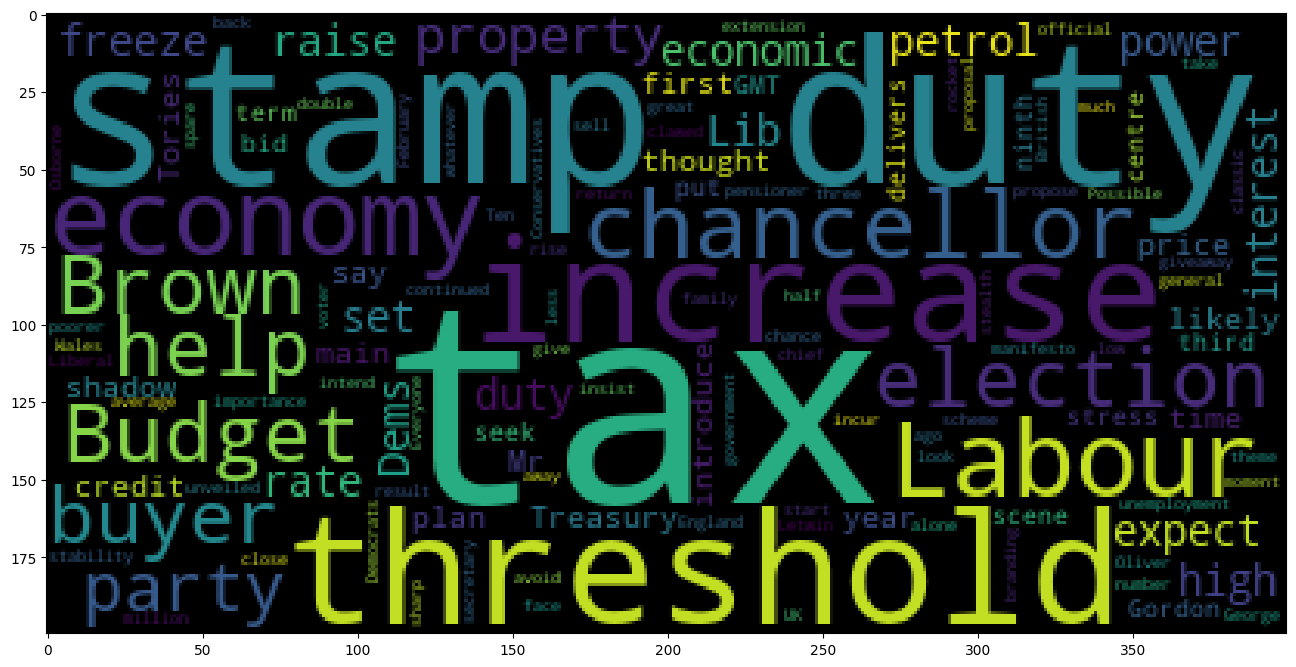

In [39]:
plt.figure(figsize= (16,9))
plt.imshow(wcloud);

#### TF*IDF Vectorizer

In [41]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [42]:
tfidf = TfidfVectorizer(analyzer=clean_text)

In [43]:
x_new = tfidf.fit_transform(df[0])

In [44]:
x_new.shape

(2225, 25671)

#### K-Means Cluster Object

In [61]:
from sklearn.cluster import KMeans

In [63]:
km = KMeans(random_state = 24)

In [65]:
labels = km.fit_predict(x_new)

In [67]:
labels.max()

7

In [69]:
km.inertia_

2085.264680937017

#### Elbow Method

In [72]:
sse = []
for k in range(1, 16):
    km = KMeans(n_clusters = k, random_state = 24, n_init = 'auto')
    km.fit_predict(x_new)
    sse.append(km.inertia_)

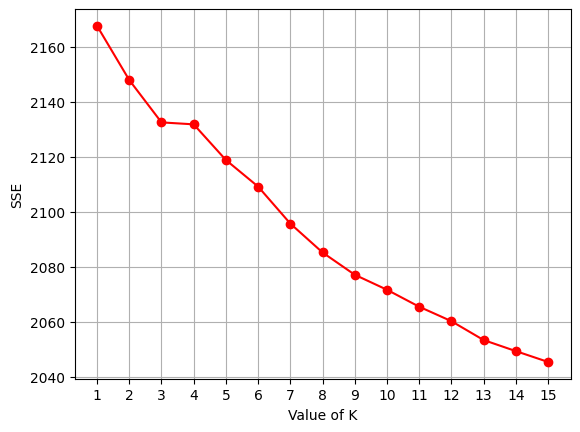

In [73]:
plt.xlabel('Value of K')
plt.ylabel('SSE')
plt.grid()
plt.xticks(range(1, 16))
plt.plot(range(1, 16), sse, marker = 'o', color = 'r');

#### Create the clusters

In [75]:
km = KMeans(random_state= 24, n_clusters = 5, n_init = 'auto')

In [76]:
labels = km.fit_predict(x_new)

In [81]:
labels

array([3, 3, 3, ..., 1, 1, 1])

#### Separate the Clusters

In [84]:
# Extracting the news which labeled as zero
zero = df[labels == 0]
one = df[labels == 1]
two = df[labels == 2]
three = df[labels == 3]
four = df[labels == 4]

In [86]:
print('Cluster-0: ', len(zero))
print('Cluster-1: ', len(one))
print('Cluster-2: ', len(two))
print('Cluster-3: ', len(three))
print('Cluster-4: ', len(four))

Cluster-0:  699
Cluster-1:  198
Cluster-2:  93
Cluster-3:  785
Cluster-4:  450


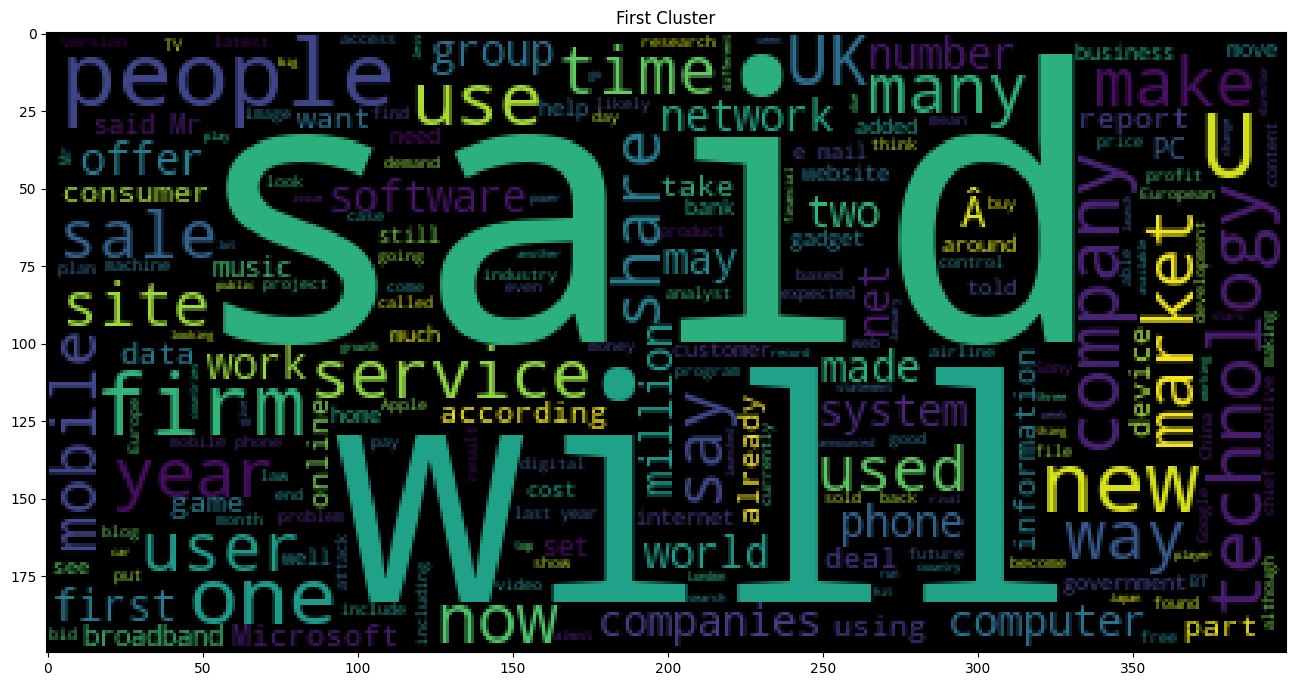

In [88]:
wc = WordCloud().generate(' '.join(zero[0]))
plt.figure(figsize= (16,9))
plt.title('First Cluster')
plt.imshow(wc)

In [89]:
from nltk import FreqDist
new = ' '.join(one[0])
clean = [x for x in word_tokenize(new) if x.lower() not in swords and x.isalpha()]
freq = FreqDist(clean)
freq.most_common(10)
# finance

[('US', 435),
 ('year', 360),
 ('growth', 312),
 ('economy', 306),
 ('economic', 240),
 ('oil', 213),
 ('prices', 200),
 ('Yukos', 192),
 ('market', 184),
 ('also', 176)]

In [90]:
from nltk import FreqDist
new = ' '.join(two[0])
clean = [x for x in word_tokenize(new) if x.lower() not in swords and x.isalpha()]
freq = FreqDist(clean)
freq.most_common(10)
# Sport

[('Olympic', 126),
 ('world', 114),
 ('race', 99),
 ('Athens', 95),
 ('champion', 91),
 ('European', 81),
 ('also', 76),
 ('best', 74),
 ('would', 70),
 ('drugs', 69)]

In [91]:
from nltk import FreqDist
new = ' '.join(three[0])
clean = [x for x in word_tokenize(new) if x.lower() not in swords and x.isalpha()]
freq = FreqDist(clean)
freq.most_common(10)
# Political & Election

[('Mr', 1931),
 ('would', 1276),
 ('also', 827),
 ('people', 804),
 ('Labour', 756),
 ('government', 751),
 ('film', 673),
 ('best', 600),
 ('Blair', 588),
 ('election', 561)]

In [94]:
from nltk import FreqDist
new = ' '.join(four[0])
clean = [x for x in word_tokenize(new) if x.lower() not in swords and x.isalpha()]
freq = FreqDist(clean)
freq.most_common(10)



[('game', 676),
 ('England', 463),
 ('first', 406),
 ('would', 369),
 ('win', 360),
 ('play', 346),
 ('players', 334),
 ('games', 331),
 ('time', 331),
 ('two', 325)]